In [11]:
#IMPORTING ALL THE NECESSARY LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error as mse,PredictionErrorDisplay
from sklearn.compose import ColumnTransformer,TransformedTargetRegressor
from sklearn.linear_model import Ridge

In [12]:
#LOADING THE CSV FILE USING PANDAS
df=pd.read_csv('boston.csv')

In [13]:
#CHECKING FIRST FIVE ROWS OF DATA FRAME
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [14]:
#SEPERATING THE FEATURES AND TARGET VARIABLE
x=df.drop('MEDV',axis=1)
y=df.MEDV
#SPLITTING THE DATA INTO TRAIN AND TEST
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
#SCALING ALL OUR PREDICTOR VARIABLES AND FEEDING THEM TO COLUMN TRANSFORMER
cols=df.columns.drop('MEDV')
scaler=StandardScaler()
preprocessor=ColumnTransformer(transformers=[('num',scaler,cols)])

In [16]:
#CREATING PIPELINE
regressor=Ridge()
pipeline=Pipeline(steps=[('preprocessor',preprocessor),
                        ('model',TransformedTargetRegressor(regressor=regressor,func=np.log,inverse_func=np.exp))])
pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object'))])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=Ridge()))])

In [17]:
#MEAN_SQUARED_ERROR FOR TESTING DATA
y_pred_test=pipeline.predict(x_test)
mse_test=np.sqrt(mse(y_test,y_pred_test))

In [18]:
#MEAN_SQUARED_ERROR FOR TRAINING DATA
y_pred_train=pipeline.predict(x_train)
mse_train=np.sqrt(mse(y_train,y_pred_train))

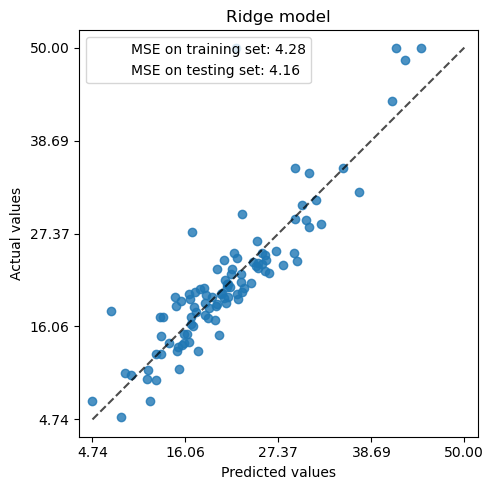

In [19]:
#PLOTTING RESULTS
scores = {
    "MSE on training set": f"{mse_train:.2f}",
    "MSE on testing set": f"{mse_test:.2f} ",
}
_, ax = plt.subplots(figsize=(5, 5))
display = PredictionErrorDisplay.from_predictions(
    y_test, y_pred_test, kind="actual_vs_predicted", ax=ax
)
ax.set_title("Ridge model")
for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")
plt.tight_layout()